In [276]:
#Import the libraries
import pandas as pd
import numpy as np

In [277]:
#load the data
path="https://raw.githubusercontent.com/anujvyas/Machine-Learning-Projects/master/Data%20Scientist's%20Salary%20Prediction/glassdoor_jobs.csv"
#Read the data
data=pd.read_csv(path)

In [278]:
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [279]:
#Shape
data.shape

(956, 15)

In [280]:
data.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [282]:
#check any null values present in the data
data.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [283]:
data.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [284]:
print("Shape of data before removing: {}".format(data.shape))
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
print("Shape of data after removing: {}".format(data.shape))

Shape of data before removing: (956, 15)
Shape of data after removing: (956, 14)


In [285]:
#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [286]:
data.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1


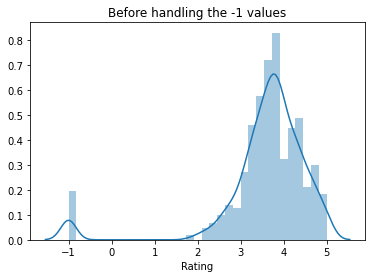

In [287]:
ax=sns.distplot(data['Rating'])
ax.set_title('Before handling the -1 values')
plt.show()

In [288]:
data['Rating']=data['Rating'].apply(lambda x:np.NaN if x==-1 else x)


In [289]:
data['Rating']=data['Rating'].fillna(data['Rating'].mean())

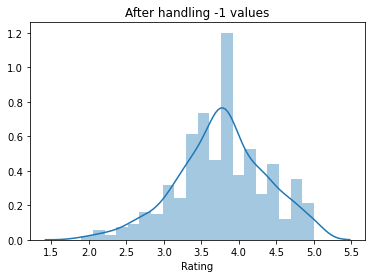

In [290]:
ax=sns.distplot(data['Rating'])
ax.set_title('After handling -1 values')
plt.show()

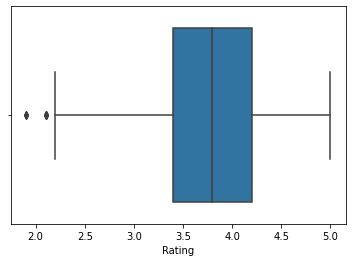

In [291]:
ax=sns.boxplot(data['Rating'])

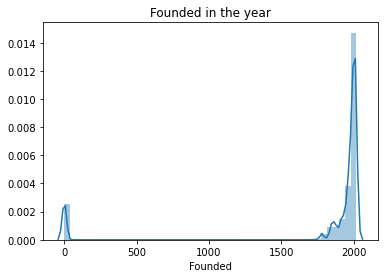

In [292]:
ax=sns.distplot(data['Founded'])
ax.set_title('Founded in the year')
plt.show()

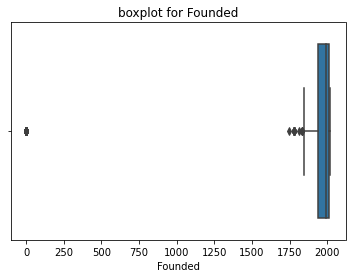

In [293]:
ax=sns.boxplot(data['Founded'])
ax.set_title('boxplot for Founded')
plt.show()

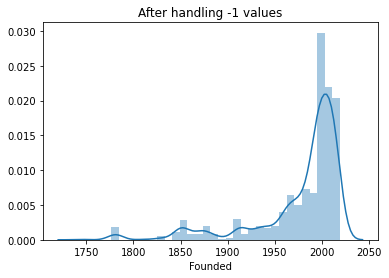

In [294]:
data['Founded']=data['Founded'].apply(lambda x: np.NaN if x==-1 else x)
data['Founded']=data['Founded'].fillna(data['Founded'].median())
ax=sns.distplot(data['Founded'])
ax.set_title('After handling -1 values')
plt.show()

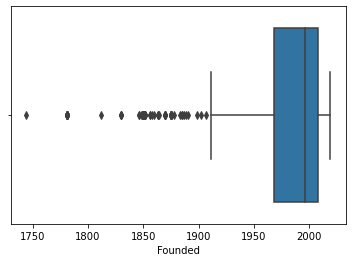

In [295]:
sns.boxplot(data['Founded'])


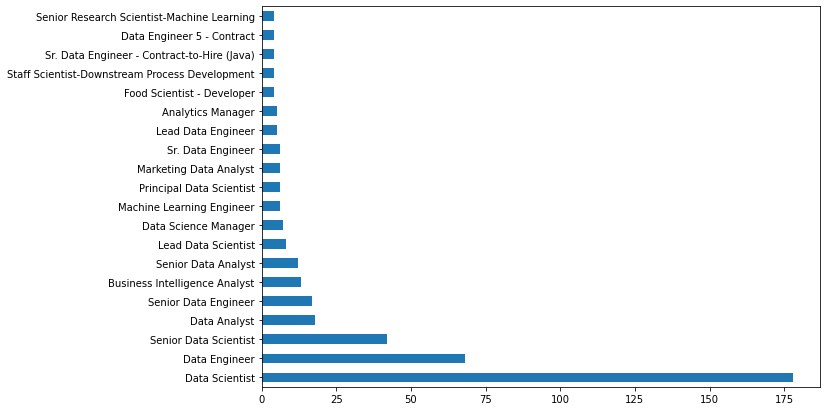

In [296]:
plt.figure(figsize=(10,7))
data['Job Title'].value_counts().nlargest(20).plot.barh()

In [297]:
def title_clean(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning engineer' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

In [298]:
data['Job_title']=data['Job Title'].apply(title_clean)

In [299]:
data['Job Title'].value_counts()

Data Scientist                   178
Data Engineer                     68
Senior Data Scientist             42
Data Analyst                      18
Senior Data Engineer              17
                                ... 
Sr. Scientist II                   1
Sr. Data Scientist                 1
Analytics Consultant               1
Data Architect / Data Modeler      1
ATL - Data & Analytics (DA)        1
Name: Job Title, Length: 328, dtype: int64

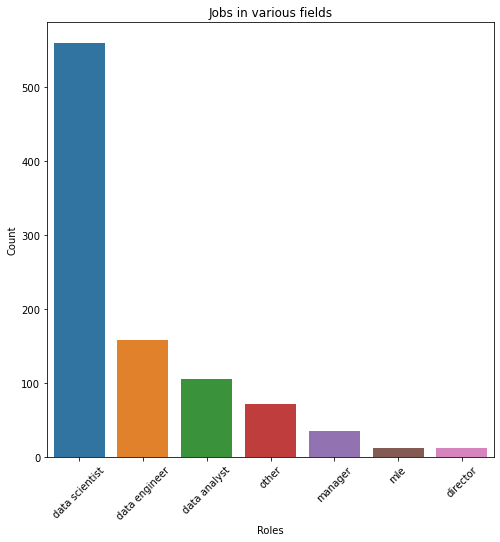

In [300]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Job_title', data=data, order=data['Job_title'].value_counts().index)
ax.set_title('Jobs in various fields')
ax.set_xlabel('Roles')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [301]:
def job_sceniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'principal' in title.lower() or 'lead' in title.lower():
        return 'sr'
    elif 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'other'

In [302]:
data['Job_seniority']=data['Job Title'].apply(job_sceniority)

In [303]:
data['Job_seniority'].value_counts()

other    701
sr       252
jr         3
Name: Job_seniority, dtype: int64

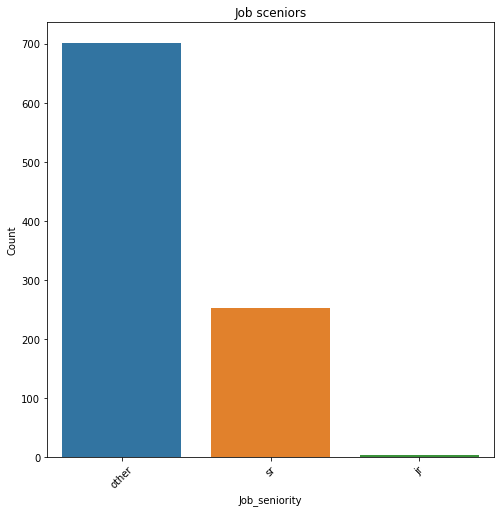

In [304]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Job_seniority',data=data,order=data['Job_seniority'].value_counts().index)
ax.set_title('Job sceniors')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_ylabel('Count')
plt.show()

In [305]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title,Job_seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,other
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,other
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,other
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,other


In [306]:
salary=data['Salary Estimate'].apply(lambda x: x.split("(")[0])

In [307]:
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [308]:
salary=salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [309]:
salary=salary.apply(lambda x: x if type(x)==type(3.5) else x.replace('$','').replace('K',''))

In [310]:
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [311]:
len(salary.unique())

417

In [312]:
salary=salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace('employer provided salary:',''))

In [313]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 ', '68-129 ', '52-113 ', '110-150', '150-160',
       '158-211 ', '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ',
       '86-144 ', '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ',
       '107-172 ', '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ',
       '96-161 ', '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ',
       '74-122 ', '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ',
       '37-76 ', '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ',
       '31-65 ', '34-62 ', '117-231 ', '79-134 ', '52-93 ', 

In [314]:
#Convert per hour salaries to year salaries
def hourly_to_yearly(minlimit,maxlimit):
    x=minlimit.strip()
    y=maxlimit.strip()
    x=int(int(minlimit)*45*52/1000)
    y=int(int(maxlimit)*45*52/1000)
    
    return '{}-{}'.format(x,y)

In [315]:
salary=salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour","").split("-")[0],x.lower().replace("per hour","").split("-")[1]) if "per hour" in x.lower() else x))

In [316]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 ', '68-129 ', '52-113 ', '110-150', '150-160',
       '158-211 ', '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ',
       '86-144 ', '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ',
       '107-172 ', '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ',
       '96-161 ', '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ',
       '74-122 ', '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ',
       '37-76 ', '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ',
       '31-65 ', '34-62 ', '117-231 ', '79-134 ', '52-93 ', 

In [317]:
data['Salary']=salary.apply(lambda x: x if type(x)==type(3.5) else (int(x.split("-")[0])+int(x.split("-")[1].strip()))/2)

In [318]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title,Job_seniority,Salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,other,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,other,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,other,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,other,114.5


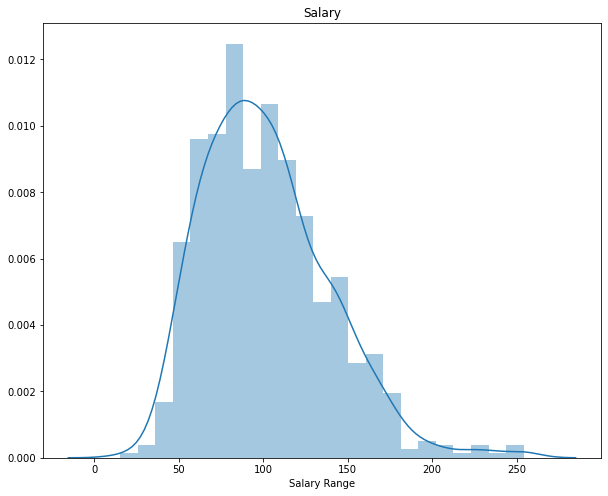

In [319]:
plt.figure(figsize=(10,8))
ax=sns.distplot(data['Salary'])
ax.set_title('Salary')
ax.set_xlabel('Salary Range')
plt.show()

In [320]:
data['Company Name']=data['Company Name'].apply(lambda x: x.split('\n')[0])

Text(0.5, 1.0, 'Top 15 Companies')

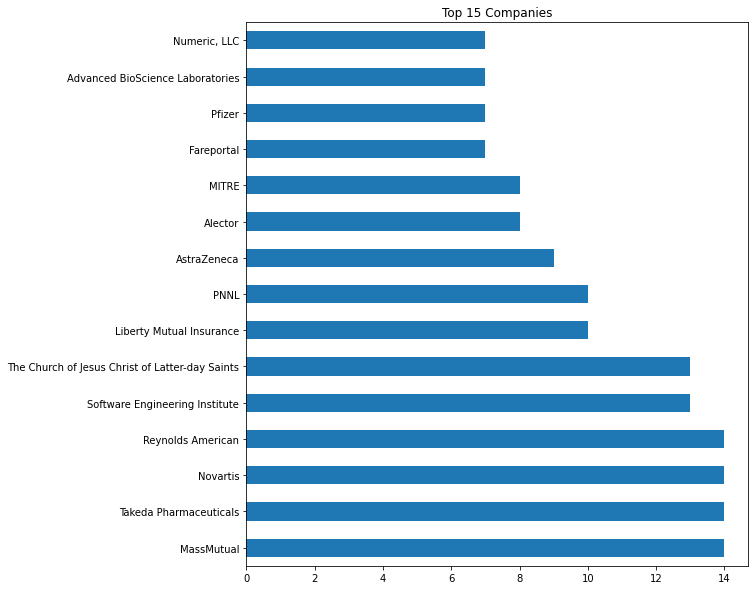

In [321]:
plt.figure(figsize=(9,10))
data['Company Name'].value_counts().nlargest(15).plot.barh()
plt.title('Top 15 Companies')

In [322]:
data['Job_location']=data['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())

Text(0.5, 1.0, 'Top15 job Locations')

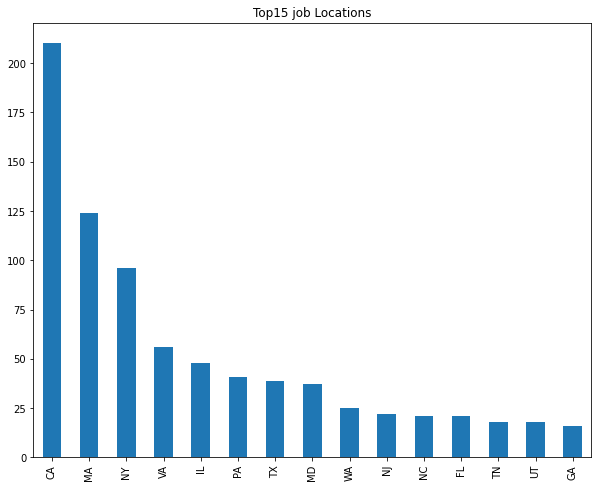

In [323]:
plt.figure(figsize=(10,8))
data['Job_location'].value_counts().nlargest(15).plot.bar()
plt.title('Top15 job Locations')

In [324]:
data['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [325]:
def size_change(text):
    if '-1' in text.lower():
        return 'Unknown'
    else:
        return text
data['Size']=data['Size'].apply(size_change)

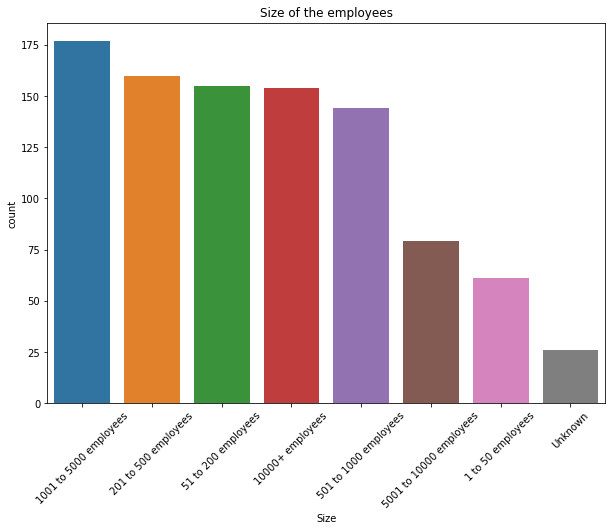

In [326]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Size',data=data,order=data['Size'].value_counts().index)
ax.set_title('Size of the employees')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [327]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title,Job_seniority,Salary,Job_location
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other,72.0,NM
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,other,87.5,MD
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,other,85.0,FL
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,other,76.5,WA
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,other,114.5,NY


In [328]:
data['Headquarters_location']=data['Headquarters'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())

In [329]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title,Job_seniority,Salary,Job_location,Headquarters_location
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other,72.0,NM,CA
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,other,87.5,MD,MD
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,other,85.0,FL,FL
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,other,76.5,WA,WA
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,other,114.5,NY,NY


In [330]:
data['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
-1                                 11
Unknown                            11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [331]:
def ownership_simplifier(text):
    if 'private' in text.lower():
        return 'Private'
    elif 'public' in text.lower():
        return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()):
        return 'Other Organisation'
    else:
        return text


In [332]:
data['Type of ownership']=data['Type of ownership'].apply(ownership_simplifier)

In [333]:
data['Type of ownership'].value_counts()

Private                           533
Public                            237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Other Organisation                 29
Government                         17
Hospital                           15
College / University               15
Other Organization                  5
Name: Type of ownership, dtype: int64

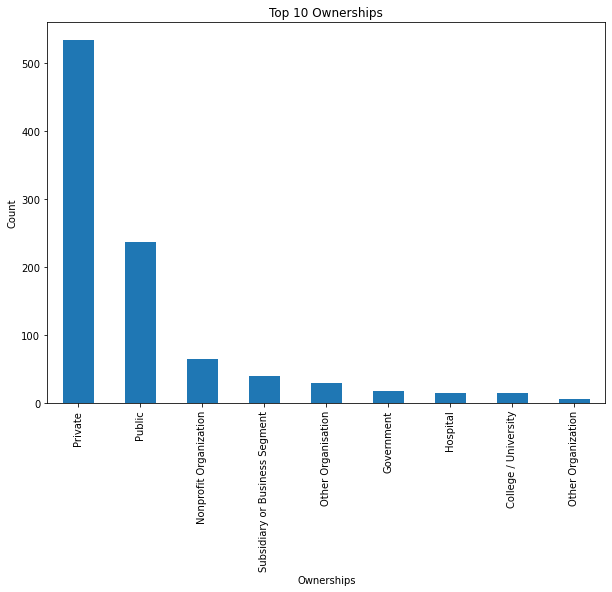

In [334]:
plt.figure(figsize=(10,7))
ax=data['Type of ownership'].value_counts().nlargest(10).plot.bar()
ax.set_xlabel('Ownerships')
ax.set_ylabel('Count')
ax.set_title('Top 10 Ownerships')
plt.show()

In [335]:
data['Industry'].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Food & Beverage Manufacturing', 'Telecommunications Services',
       'IT Services', 'Computer Hardware & Software', '-1',
       'Consumer Products Manufacturing',
       'Investment Banking & Asset Management',
       'Industrial Manufacturing', 'Staffing & Outsourcing',
       'Metals Brokers', 'Financial Transaction Processing',
       'Sporting Goods Stores', 'Wholesale', 'Mining',
       'Financial Analytics & Research', 'Federal Agencies',
       'Educa

In [336]:
data['Industry']=data['Industry'].apply(lambda x:np.NaN if x=='-1' else x)

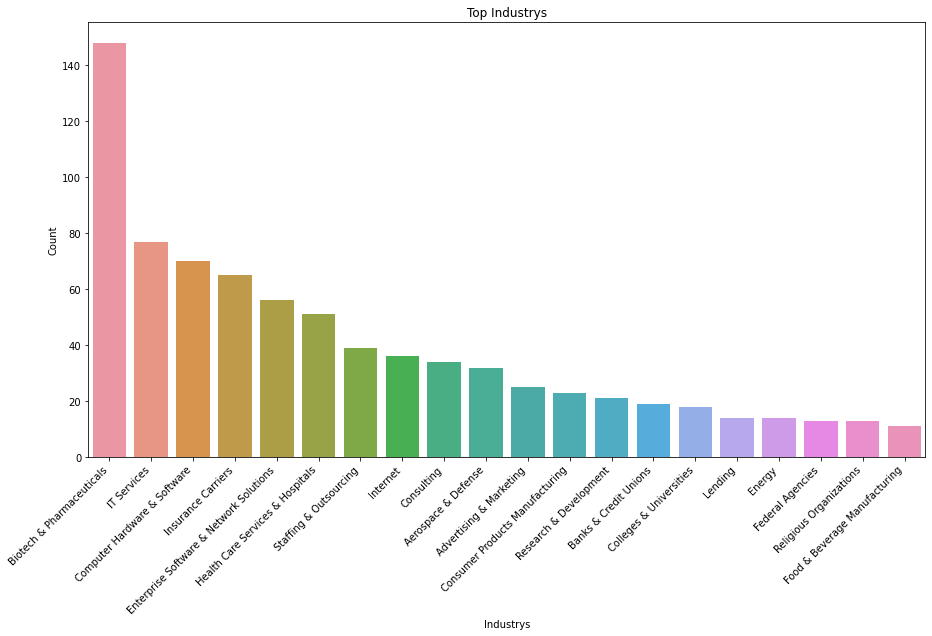

In [337]:
plt.figure(figsize=(15,8))
a=sns.countplot(x='Industry',data=data,order=data['Industry'].value_counts()[:20].index)
a.set_title('Top Industrys')
a.set_xlabel('Industrys')
a.set_ylabel('Count')
a.set_xticklabels(a.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

In [338]:
data['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Non-Profit                             16
Retail                                 16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Real Estate                             8
Transportation & Logistics              8
Travel & Tourism                        8
Telecommunications                      6
Consumer Services                       4
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Mining & Metals                         3
Agriculture & Forestry            

In [339]:
data['Sector']=data['Sector'].apply(lambda x: np.NaN if x=='-1' else x)

In [340]:
data['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
Aerospace & Defense                    32
Education                              26
Non-Profit                             16
Retail                                 16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Real Estate                             8
Transportation & Logistics              8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Accounting & Legal                      1
Agriculture & Forestry            

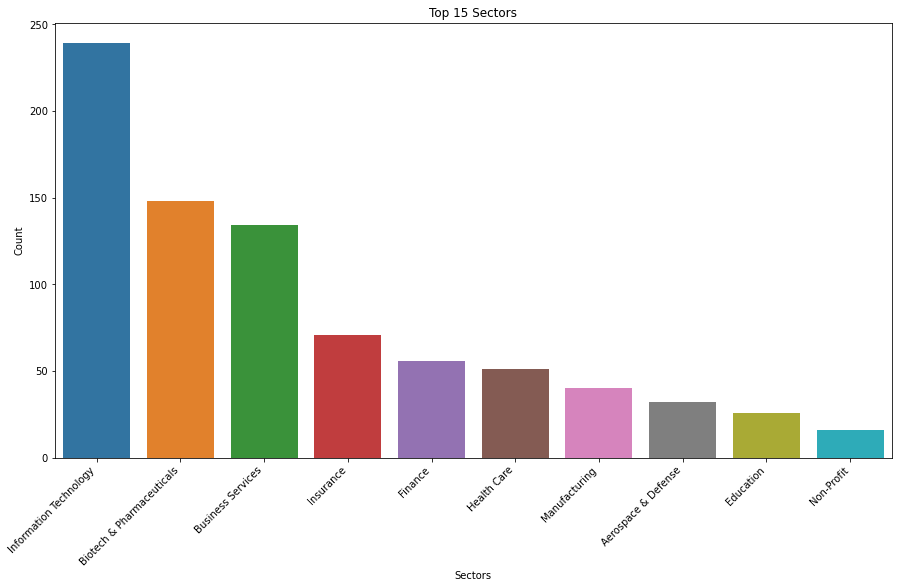

In [341]:
plt.figure(figsize=(15,8))
a=sns.countplot(x='Sector',data=data,order=data['Sector'].value_counts()[:10].index)
a.set_xlabel('Sectors')
a.set_ylabel('Count')
a.set_xticklabels(a.get_xticklabels(),rotation=45,horizontalalignment='right')
a.set_title('Top 15 Sectors')
plt.show()

In [342]:
data['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)', '-1'], dtype=object)

In [343]:
def revenue_clean(text):
    if ('-1' in text.lower()) or ('unknown / non-applicable' in text.lower()):
        return np.NaN
    else:
        return text

In [344]:
data['Revenue']=data['Revenue'].apply(revenue_clean)

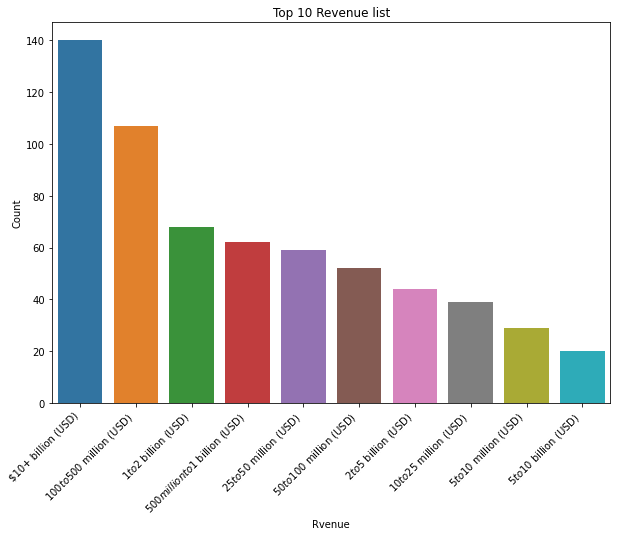

In [345]:
plt.figure(figsize=(10,7))
a=sns.countplot(x='Revenue',data=data,order=data['Revenue'].value_counts()[:10].index)
a.set_title('Top 10 Revenue list')
a.set_xlabel('Rvenue')
a.set_ylabel('Count')
a.set_xticklabels(a.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

In [346]:
data['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
954                                               Slalom
955                                                   -1
Name: Competitors, Length: 956, dtype: object

In [347]:
data['Competitors']=data['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

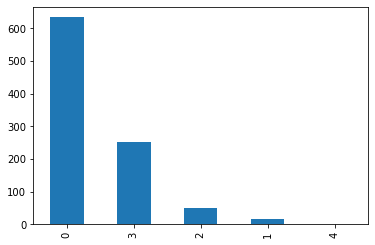

In [348]:
data['Competitors'].value_counts().plot.bar()

In [349]:
data['Job_in_headquarters']=data.apply(lambda x: 1 if x['Job_location']==x['Headquarters_location'] else 0,axis=1)

In [350]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title,Job_seniority,Salary,Job_location,Headquarters_location,Job_in_headquarters
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,NM,CA,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,MD,MD,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Private,Security Services,Business Services,$100 to $500 million (USD),0,data scientist,other,85.0,FL,FL,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,data scientist,other,76.5,WA,WA,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Private,Advertising & Marketing,Business Services,NaN,3,data scientist,other,114.5,NY,NY,1


In [351]:
#Creating a columns for 'python' ,'sql' ,'excel', 'tableau'
data['Python_job']=data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [352]:
data['Excel_job']=data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
data['Sql_job']=data['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
data['Tableu_job']=data['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

In [353]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title,Job_seniority,Salary,Job_location,Headquarters_location,Job_in_headquarters,Python_job,Excel_job,Sql_job,Tableu_job
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,NM,CA,0,1,1,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,MD,MD,1,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Private,Security Services,Business Services,$100 to $500 million (USD),0,data scientist,other,85.0,FL,FL,1,1,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,data scientist,other,76.5,WA,WA,1,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Private,Advertising & Marketing,Business Services,NaN,3,data scientist,other,114.5,NY,NY,1,1,1,1,0


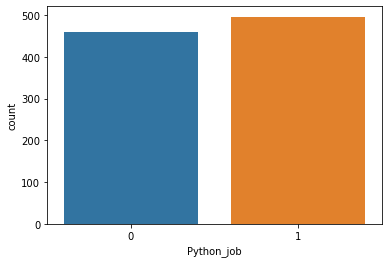

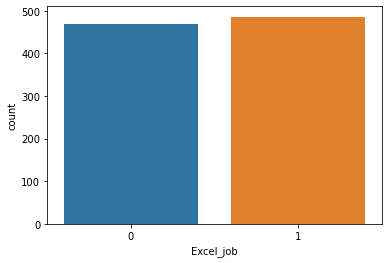

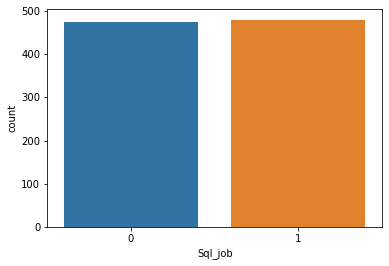

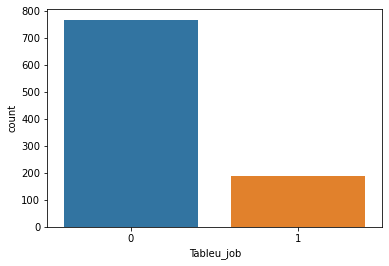

In [354]:
jobs_df=data[['Python_job','Excel_job','Sql_job','Tableu_job']]

for feature in jobs_df.columns:
    data=data.copy()
    sns.countplot(feature,data=data)
    plt.show()

In [355]:
#Trimming the 'Sector' column
#Taking top 10 Sectors and replacing remaining by others
sector_list=list(data['Sector'].value_counts().nlargest(10).index)

In [356]:
def sector_simplifier(text):
    if text not in sector_list:
        return 'Others'
    else:
        return text

In [357]:
data['Sector']=data['Sector'].apply(sector_simplifier)

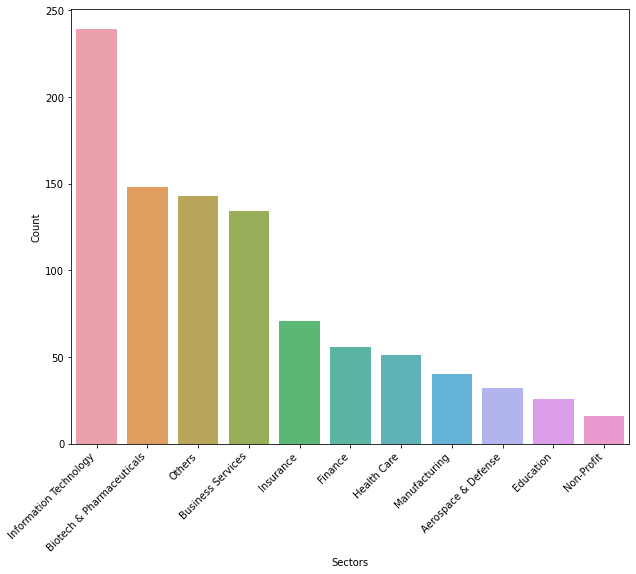

In [358]:
plt.figure(figsize=(10,8))
g=sns.countplot(x='Sector',data=data,order=data['Sector'].value_counts().index,alpha=0.9)
g.set_xlabel('Sectors')
g.set_ylabel('Count')
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

In [359]:
#Trimming job_location columns by taking top 9 states
job_loc=list(data['Job_location'].value_counts().nlargest(10).index)

In [360]:
def job_top10(text):
    if text not in job_loc:
        return 'Others'
    else:
        return text

In [361]:
data['Job_location']=data['Job_location'].apply(job_top10)

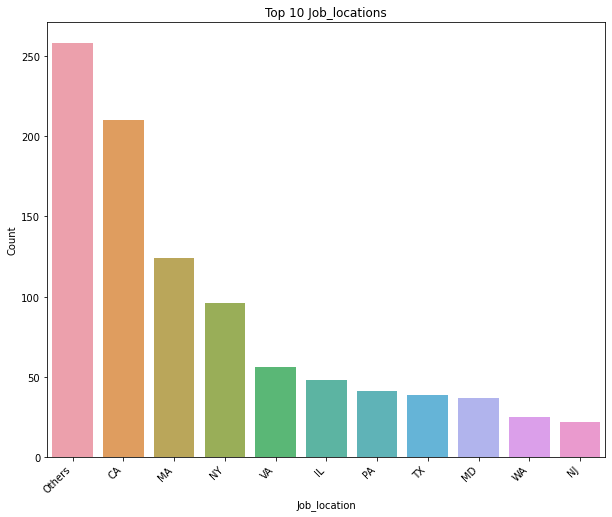

In [362]:
plt.figure(figsize=(10,8))
g=sns.countplot(x='Job_location',data=data,order=data['Job_location'].value_counts().index,alpha=0.9)
g.set_xlabel('Job_location')
g.set_title('Top 10 Job_locations')
g.set_ylabel('Count')
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

In [363]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Job_title', 'Job_seniority', 'Salary', 'Job_location',
       'Headquarters_location', 'Job_in_headquarters', 'Python_job',
       'Excel_job', 'Sql_job', 'Tableu_job'],
      dtype='object')

In [364]:
pd.pandas.set_option('display.max_columns',None)
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title,Job_seniority,Salary,Job_location,Headquarters_location,Job_in_headquarters,Python_job,Excel_job,Sql_job,Tableu_job
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,Others,CA,0,1,1,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,MD,MD,1,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Private,Security Services,Business Services,$100 to $500 million (USD),0,data scientist,other,85.0,Others,FL,1,1,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,Others,$500 million to $1 billion (USD),3,data scientist,other,76.5,WA,WA,1,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Private,Advertising & Marketing,Business Services,NaN,3,data scientist,other,114.5,NY,NY,1,1,1,1,0


In [365]:
#Drop the unnessacry columns that was not required for further operations
data=data.drop(labels=['Salary Estimate','Job_location','Headquarters','Company Name','Industry'],axis=1)

In [366]:
data=data.drop(labels=['Job Title','Job Description','Location','Headquarters_location'],axis=1)

In [367]:
data.head()

,Rating,Size,Founded,Type of ownership,Sector,Revenue,Competitors,Job_title,Job_seniority,Salary,Job_in_headquarters,Python_job,Excel_job,Sql_job,Tableu_job
0,3.8,501 to 1000 employees,1973.0,Private,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,0,1,1,0,1
1,3.4,10000+ employees,1984.0,Other Organization,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,1,1,0,0,0
2,4.8,501 to 1000 employees,2010.0,Private,Business Services,$100 to $500 million (USD),0,data scientist,other,85.0,1,1,1,1,0
3,3.8,1001 to 5000 employees,1965.0,Government,Others,$500 million to $1 billion (USD),3,data scientist,other,76.5,1,1,0,0,0
4,2.9,51 to 200 employees,1998.0,Private,Business Services,NaN,3,data scientist,other,114.5,1,1,1,1,0


In [368]:
#Renaming the columns for the simplicity
data.rename(columns={'Rating':'company_rating','Size':'company_size','Founded':'company_founded','Type of ownership':'type_of_ownership','Sector':'sector','Revenue':'revenue','Competitors':'competitors'},inplace=True)

In [369]:
data.head()

,company_rating,company_size,company_founded,type_of_ownership,sector,revenue,competitors,Job_title,Job_seniority,Salary,Job_in_headquarters,Python_job,Excel_job,Sql_job,Tableu_job
0,3.8,501 to 1000 employees,1973.0,Private,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,0,1,1,0,1
1,3.4,10000+ employees,1984.0,Other Organization,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,1,1,0,0,0
2,4.8,501 to 1000 employees,2010.0,Private,Business Services,$100 to $500 million (USD),0,data scientist,other,85.0,1,1,1,1,0
3,3.8,1001 to 5000 employees,1965.0,Government,Others,$500 million to $1 billion (USD),3,data scientist,other,76.5,1,1,0,0,0
4,2.9,51 to 200 employees,1998.0,Private,Business Services,NaN,3,data scientist,other,114.5,1,1,1,1,0


In [370]:
data['company_size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     26
Name: company_size, dtype: int64

In [371]:
size_map={'Unknown':0,'1 to 50 employees':1,'51 to 200 employees':2,'201 to 500 employees':3,'501 to 1000 employees':4,
         '1001 to 5000 employees':5,'5001 to 10000 employees':6,'10000+ employees':7}
data['company_size']=data['company_size'].map(size_map)

In [372]:
data['revenue'].value_counts()

$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
Less than $1 million (USD)            9
Name: revenue, dtype: int64

In [373]:
data['revenue']=data['revenue'].fillna(0)
revenue_map={'Less than $1 million (USD)':1,'$1 to $5 million (USD)':2,
            '$5 to $10 million (USD)':3,'$10 to $25 million (USD)':4,
            '$25 to $50 million (USD)':5,'$50 to $100 million (USD)':6,
            '$100 to $500 million (USD)':7,'$500 million to $1 billion (USD)':8,
            '$1 to $2 billion (USD)':9,'$2 to $5 billion (USD)':10,
            '$5 to $10 billion (USD)':11,'$10+ billion (USD)':12}

data['revenue']=data['revenue'].map(revenue_map)

In [374]:
data.head()

,company_rating,company_size,company_founded,type_of_ownership,sector,revenue,competitors,Job_title,Job_seniority,Salary,Job_in_headquarters,Python_job,Excel_job,Sql_job,Tableu_job
0,3.8,4,1973.0,Private,Aerospace & Defense,6.0,0,data scientist,other,72.0,0,1,1,0,1
1,3.4,7,1984.0,Other Organization,Health Care,10.0,0,data scientist,other,87.5,1,1,0,0,0
2,4.8,4,2010.0,Private,Business Services,7.0,0,data scientist,other,85.0,1,1,1,1,0
3,3.8,5,1965.0,Government,Others,8.0,3,data scientist,other,76.5,1,1,0,0,0
4,2.9,2,1998.0,Private,Business Services,NaN,3,data scientist,other,114.5,1,1,1,1,0


In [375]:
job_sce_map={'other':0,'jr':1,'sr':2}
data['Job_seniority']=data['Job_seniority'].map(job_sce_map)

In [376]:
data.head()

,company_rating,company_size,company_founded,type_of_ownership,sector,revenue,competitors,Job_title,Job_seniority,Salary,Job_in_headquarters,Python_job,Excel_job,Sql_job,Tableu_job
0,3.8,4,1973.0,Private,Aerospace & Defense,6.0,0,data scientist,0,72.0,0,1,1,0,1
1,3.4,7,1984.0,Other Organization,Health Care,10.0,0,data scientist,0,87.5,1,1,0,0,0
2,4.8,4,2010.0,Private,Business Services,7.0,0,data scientist,0,85.0,1,1,1,1,0
3,3.8,5,1965.0,Government,Others,8.0,3,data scientist,0,76.5,1,1,0,0,0
4,2.9,2,1998.0,Private,Business Services,NaN,3,data scientist,0,114.5,1,1,1,1,0


In [377]:
ownership=pd.get_dummies(data['type_of_ownership'],drop_first=True)

In [378]:
data=pd.concat([data,ownership],axis=1)
data=data.drop(columns=['type_of_ownership'],axis=1)

In [379]:
data=pd.get_dummies(columns=['Job_title'],data=data)
data=pd.get_dummies(columns=['sector'],data=data)

In [380]:
data=data.drop(columns=['Other Organisation'],axis=1)

In [381]:
data.head()

,company_rating,company_size,company_founded,revenue,competitors,Job_seniority,Salary,Job_in_headquarters,Python_job,Excel_job,Sql_job,Tableu_job,Government,Hospital,Nonprofit Organization,Other Organization,Private,Public,Subsidiary or Business Segment,Job_title_data analyst,Job_title_data engineer,Job_title_data scientist,Job_title_director,Job_title_manager,Job_title_mle,Job_title_other,sector_Aerospace & Defense,sector_Biotech & Pharmaceuticals,sector_Business Services,sector_Education,sector_Finance,sector_Health Care,sector_Information Technology,sector_Insurance,sector_Manufacturing,sector_Non-Profit,sector_Others
0,3.8,4,1973.0,6.0,0,0,72.0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,3.4,7,1984.0,10.0,0,0,87.5,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.8,4,2010.0,7.0,0,0,85.0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3.8,5,1965.0,8.0,3,0,76.5,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2.9,2,1998.0,NaN,3,0,114.5,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [382]:
data.shape

(956, 37)

In [386]:
data.dropna(inplace=True)
data.reset_index(inplace=True)

### Feature Selection

In [388]:
#split the data in to x and y
x=data.drop('Salary',axis=1)
y=data['Salary']

In [389]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

feature=SelectKBest(score_func=mutual_info_regression,k='all')
feature.fit(x,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x0000016429838280>)

In [390]:
feature.scores_

array([0.00699419, 0.53343727, 0.33355456, 0.61655589, 0.40925011,
       0.18125461, 0.17728091, 0.15386836, 0.20606295, 0.14766222,
       0.16669768, 0.12492956, 0.04796246, 0.07581612, 0.08615161,
       0.01364845, 0.12942768, 0.12497646, 0.04054933, 0.17991973,
       0.08494937, 0.19905742, 0.00674049, 0.03899975, 0.03479948,
       0.04791604, 0.01986396, 0.12692242, 0.07095308, 0.        ,
       0.03665032, 0.13187081, 0.10741983, 0.05603409, 0.09619321,
       0.0129137 , 0.07456442])

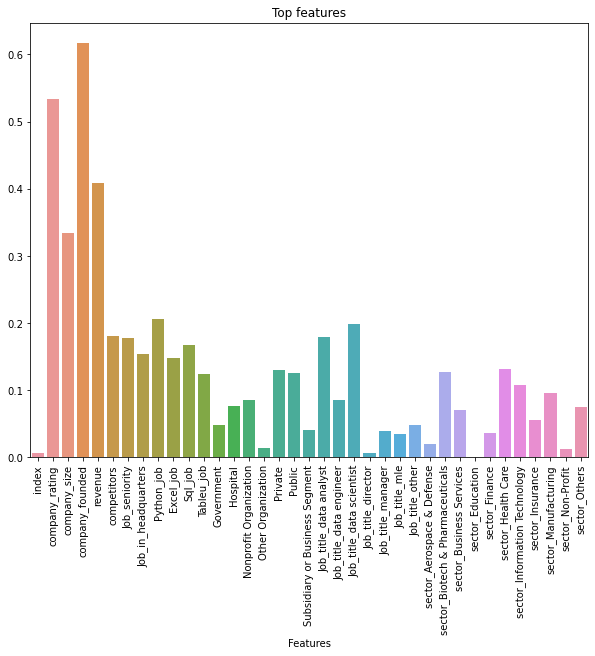

In [391]:
plt.figure(figsize=(10,8))
g=sns.barplot(x=x.columns,y=feature.scores_)
g.set_title('Top features')
g.set_xlabel('Features')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [392]:
#feature selection by extra tree regressor
from sklearn.tree import ExtraTreeRegressor
tree=ExtraTreeRegressor()
tree.fit(x,y)

ExtraTreeRegressor()

In [393]:
tree.feature_importances_

array([0.03986157, 0.02454768, 0.03668079, 0.01997803, 0.01829343,
       0.02812757, 0.13562473, 0.01873879, 0.099598  , 0.02019011,
       0.01733703, 0.02152161, 0.00398639, 0.0002151 , 0.01982952,
       0.        , 0.01381679, 0.03504354, 0.00878473, 0.18070304,
       0.00466898, 0.01714594, 0.07663115, 0.01697301, 0.02922368,
       0.0111531 , 0.00496767, 0.00350043, 0.02897546, 0.        ,
       0.00049053, 0.02710264, 0.02502387, 0.00050679, 0.00287951,
       0.        , 0.0078788 ])

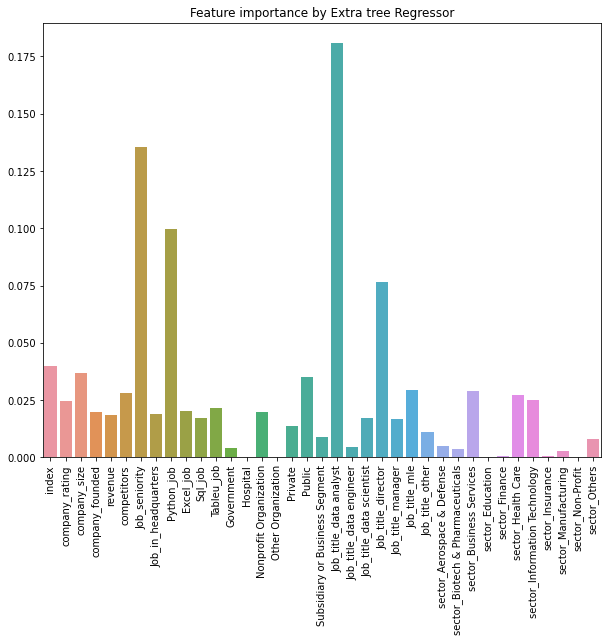

In [394]:
plt.figure(figsize=(10,8))
g=sns.barplot(x=x.columns,y=tree.feature_importances_)
g.set_title('Feature importance by Extra tree Regressor')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

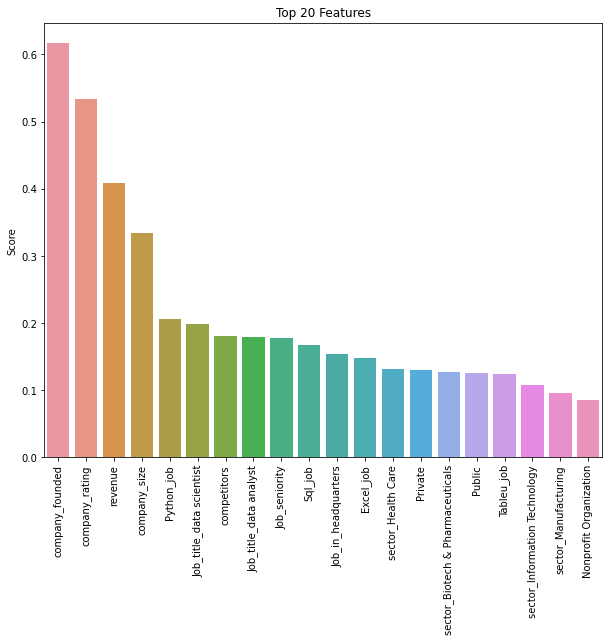

In [395]:
#From the above graph atleast 20 features that are highly impactes on target variable
feat_imp=pd.DataFrame(feature.scores_,columns=['Score'],index=x.columns)
top20_feat=feat_imp.nlargest(20,'Score')
plt.figure(figsize=(10,8))
g=sns.barplot(x=top20_feat.index,y=top20_feat['Score'])
g.set_title('Top 20 Features')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

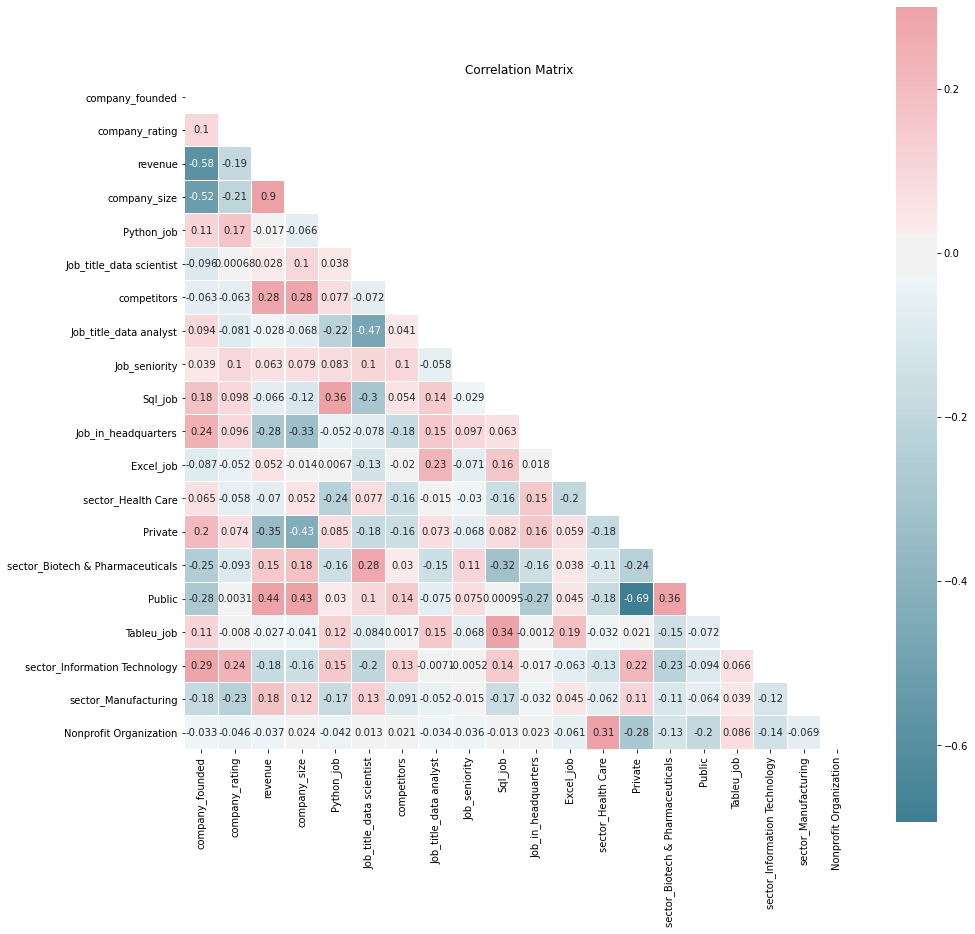

In [396]:
#Finding and plotting the correlation matrix for top20 features

cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(15,15))

corr=x[top20_feat.index].corr()

#Genrate a mask triangle for a upper traingle
mask=np.triu(np.ones_like(corr,dtype=np.bool))

g=sns.heatmap(corr,annot=True,mask=mask,vmax=0.3,center=0,square=True,cmap=cmap,linewidths=0.05)
plt.title('Correlation Matrix')

#### Range of correlation are as follows
1. Strong Correlated: X>0.7
2. Moderate Correlated: 0.5>X<0.7
3. Negitive Correlated: X<0.5

In [398]:
#let's drop some high correlated vaiables
x=x[top20_feat.index]
x.drop(labels=['Public','company_size','revenue','Job_title_data analyst'],axis=1,inplace=True)
x.head()

,company_founded,company_rating,Python_job,Job_title_data scientist,competitors,Job_seniority,Sql_job,Job_in_headquarters,Excel_job,sector_Health Care,Private,sector_Biotech & Pharmaceuticals,Tableu_job,sector_Information Technology,sector_Manufacturing,Nonprofit Organization
0,1973.0,3.8,1,1,0,0,0,0,1,0,1,0,1,0,0,0
1,1984.0,3.4,1,1,0,0,0,1,0,1,0,0,0,0,0,0
2,2010.0,4.8,1,1,0,0,1,1,1,0,1,0,0,0,0,0
3,1965.0,3.8,1,1,3,0,0,1,0,0,0,0,0,0,0,0
4,2000.0,3.4,1,1,3,0,1,1,1,0,0,0,0,0,0,0


In [399]:
x.columns

Index(['company_founded', 'company_rating', 'Python_job',
       'Job_title_data scientist', 'competitors', 'Job_seniority', 'Sql_job',
       'Job_in_headquarters', 'Excel_job', 'sector_Health Care', 'Private',
       'sector_Biotech & Pharmaceuticals', 'Tableu_job',
       'sector_Information Technology', 'sector_Manufacturing',
       'Nonprofit Organization'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

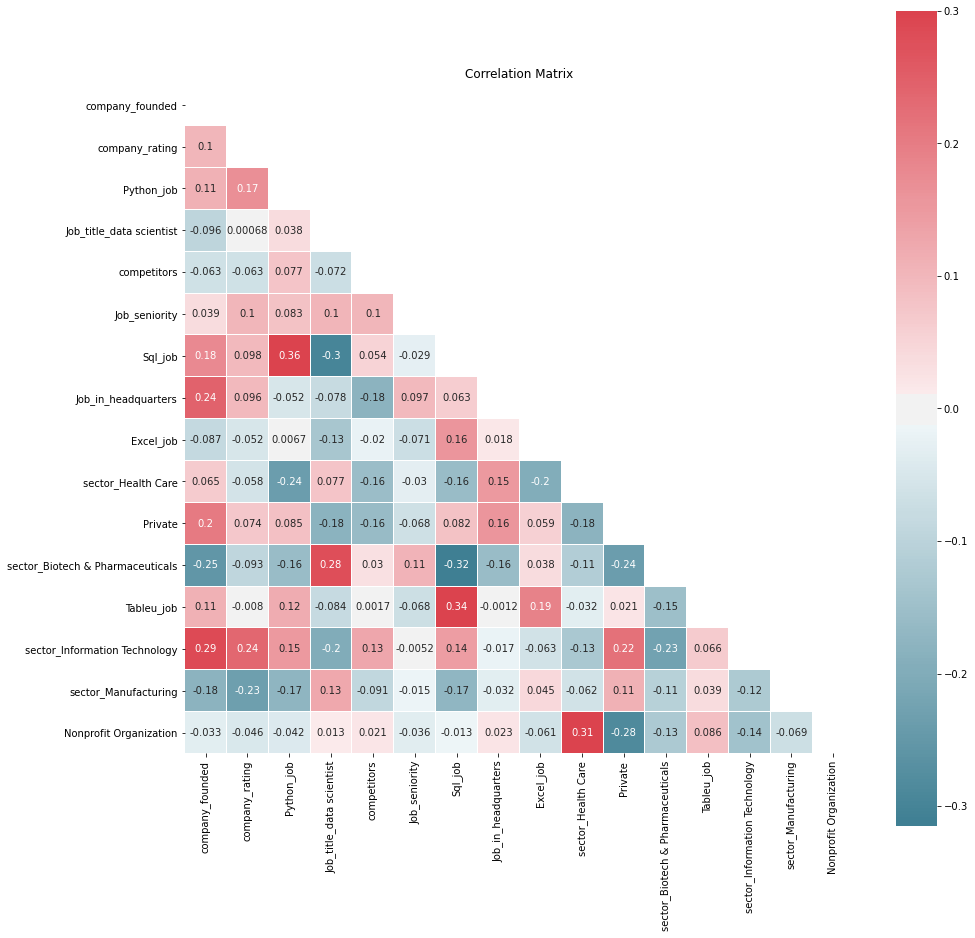

In [400]:
#Finding and plotting the correlation matrix for top20 features

cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(15,15))

corr=x.corr()

#Genrate a mask triangle for a upper traingle
mask=np.triu(np.ones_like(corr,dtype=np.bool))

g=sns.heatmap(corr,annot=True,mask=mask,vmax=0.3,center=0,square=True,cmap=cmap,linewidths=0.05)
plt.title('Correlation Matrix')

In [401]:
x.head()

,company_founded,company_rating,Python_job,Job_title_data scientist,competitors,Job_seniority,Sql_job,Job_in_headquarters,Excel_job,sector_Health Care,Private,sector_Biotech & Pharmaceuticals,Tableu_job,sector_Information Technology,sector_Manufacturing,Nonprofit Organization
0,1973.0,3.8,1,1,0,0,0,0,1,0,1,0,1,0,0,0
1,1984.0,3.4,1,1,0,0,0,1,0,1,0,0,0,0,0,0
2,2010.0,4.8,1,1,0,0,1,1,1,0,1,0,0,0,0,0
3,1965.0,3.8,1,1,3,0,0,1,0,0,0,0,0,0,0,0
4,2000.0,3.4,1,1,3,0,1,1,1,0,0,0,0,0,0,0


In [402]:
#scale the value by Standarscaler
from sklearn.preprocessing import StandardScaler
sc_rating=StandardScaler()
x['company_rating']=sc_rating.fit_transform(x[['company_rating']])

sc_founded=StandardScaler()
x['company_founded']=sc_founded.fit_transform(x[['company_founded']])


In [403]:
x.head()

,company_founded,company_rating,Python_job,Job_title_data scientist,competitors,Job_seniority,Sql_job,Job_in_headquarters,Excel_job,sector_Health Care,Private,sector_Biotech & Pharmaceuticals,Tableu_job,sector_Information Technology,sector_Manufacturing,Nonprofit Organization
0,0.189210,0.217697,1,1,0,0,0,0,1,0,1,0,1,0,0,0
1,0.381243,-0.517085,1,1,0,0,0,1,0,1,0,0,0,0,0,0
2,0.835139,2.054651,1,1,0,0,1,1,1,0,1,0,0,0,0,0
3,0.049550,0.217697,1,1,3,0,0,1,0,0,0,0,0,0,0,0
4,0.660564,-0.517085,1,1,3,0,1,1,1,0,0,0,0,0,0,0


### Model Building & Evalution

In [405]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg=LinearRegression()
cv=cross_val_score(reg,x,y,cv=10,scoring='neg_root_mean_squared_error')
print('Avg NRMSE: {}'.format(round(cv.mean(),3)))
print('Std NRMSQ: {}'.format(round(cv.std(),3)))

Avg NRMSE: -30.811
Std NRMSQ: 2.795


In [407]:
#lasso regression
from sklearn.linear_model import Lasso
las=Lasso()
cv=cross_val_score(las,x,y,scoring='neg_root_mean_squared_error',cv=10)
print('Avg NRMSQE: {}'.format(round(cv.mean(),3)))
print('Std NRMSQE: {}'.format(round(cv.std(),3)))

Avg NRMSQE: -31.317
Std NRMSQE: 2.675


In [409]:
#Ridge Regression
from sklearn.linear_model import Ridge
rig=Ridge()
cv=cross_val_score(rig,x,y,scoring='neg_root_mean_squared_error',cv=10)
print('Avg NRMSQE: {}'.format(round(cv.mean(),3)))
print('Std NRMSQE: {}'.format(round(cv.std(),4)))

Avg NRMSQE: -30.798
Std NRMSQE: 2.785


In [410]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
cv=cross_val_score(rf,x,y,scoring='neg_root_mean_squared_error',cv=10)
print('Avg NRMSQE: {}'.format(round(cv.mean(),3)))
print('Std NRMSQE: {}'.format(round(cv.std(),3)))

Avg NRMSQE: -20.538
Std NRMSQE: 4.898


In [412]:
#Gradiant boosting
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
cv=cross_val_score(gb,x,y,scoring='neg_root_mean_squared_error',cv=10)
print('Avg NSRMQE: {}'.format(round(cv.mean(),3)))
print('Std NRMSQE: {}'.format(round(cv.std(),3)))

Avg NSRMQE: -25.675
Std NRMSQE: 2.63
